In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# зададим функцию f

f = lambda x, y: 6*x**2 - 4*x*y + 3*y**2 + 4*np.sqrt(5)*(x + 2*y) + 22
# зададим границ интервала
x0 = -2*np.sqrt(5)
y0 = 1
e = [0.01, 0.00001]

In [3]:
import matplotlib
print(matplotlib.__version__)

3.1.1


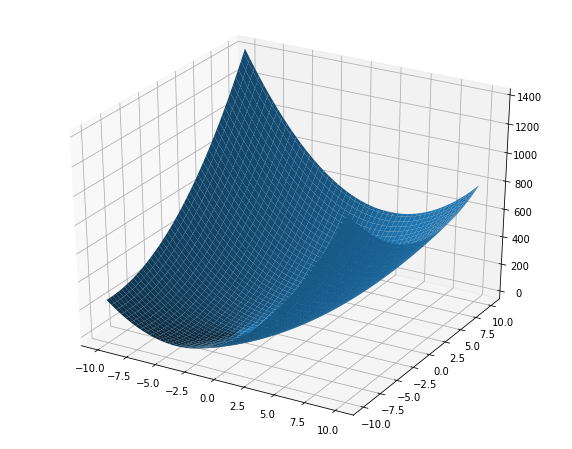

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x_grid = np.linspace(-10, 10, 100)
y_grid = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x_grid, y_grid)
z = f(x,y)
ax.plot_surface(x, y, z)

In [5]:
def golden_section(f, a, b, e):
    phi = (1 + np.sqrt(5))/2
    x1 = b - (b - a)/phi
    x2 = a + (b - a)/phi
    f1 = f(x1)
    f2 = f(x2)
    it = 0
    it = 0
    while abs(b - a) > e: # 1e-17в бесокнечный цикл
        it += 1
        # it += 1
        # if it > 1000:
        #     break
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - (x1 - a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (b - x2)
            f1 = f(x1)
    return it, (a + b)/2

def dihotomia(g, a, b, eps):
    delta = eps/2 - eps*10**(-1)
    it = 0
    while abs(b - a) > eps:
        it += 1
        x = (a + b)/2
        g1 = g(x - delta)
        g2 = g(x + delta)
        if g1 < g2:
            b = x
        else:
            a = x
    return it, (a + b)/2

def gradient(v):
    x = v[0]
    y = v[1]
    dx_grad = 12*x - 4*y + 4*np.sqrt(5)
    dy_grad = -4*x + 6*y + 8*np.sqrt(5)
    return np.array([dx_grad, dy_grad])

In [6]:
def draw(f, points):
    levels = []
    for i in range(0, len(points)):
        levels.append(f(points[i][0], points[i][1]))
    levels.sort()
    X = np.arange(-10, 5, 0.25)
    Y = np.arange(-13.5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    F = f(X, Y)
    fig, ax = plt.subplots(figsize=(8, 8))
    cs = ax.contour(X, Y, F, levels = levels)
    ax.clabel(cs)
    if len(points) == 2:
        plt.plot((points[0][0], points[1][0]),
                 (points[0][1], points[1][1]))
    else:
        for i in range(0, len(points) - 1):
            plt.plot((points[i][0], points[i + 1][0]),
                     (points[i][1], points[i + 1][1]))
    plt.grid(True)
    plt.show()

### Метод наискорейшего спуска

In [7]:
def fast_gd(f, x0, y0, eps):
    v = [x0, y0]
    points = []
    points.append(v)
    opt_it = 0
    while True:
        grad = gradient(v)
        it, s = golden_section(lambda s: f(v[0] - s*grad[0], v[1] - s*grad[1]), 0, 1, eps*1e-1)
        opt_it += it
        v_next = v - s*grad
        points.append(v_next)
        if abs(f(v_next[0], v_next[1]) - f(v[0], v[1])) <= eps:
            break
        v = v_next
    return opt_it, points, v_next

Num of its: 6
Min [-2.23806749 -4.46686098]
1-d optimization num of its: 90


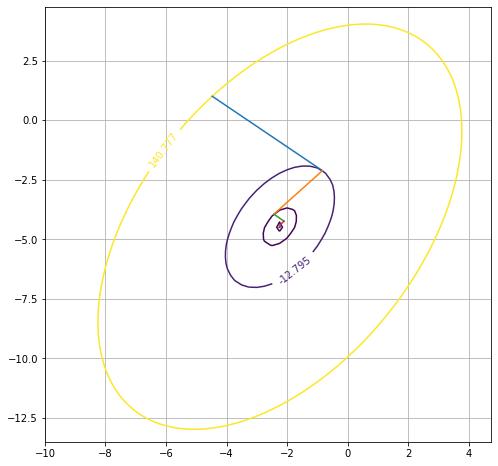

In [8]:
opt_it, points, v = fast_gd(f, x0, y0, e[0])
print("Num of its:", len(points) - 1)
print("Min", v)
print("1-d optimization num of its:", opt_it)
draw(f, points)

Num of its: 8
Min [-2.23621516 -4.47177557]
1-d optimization num of its: 232


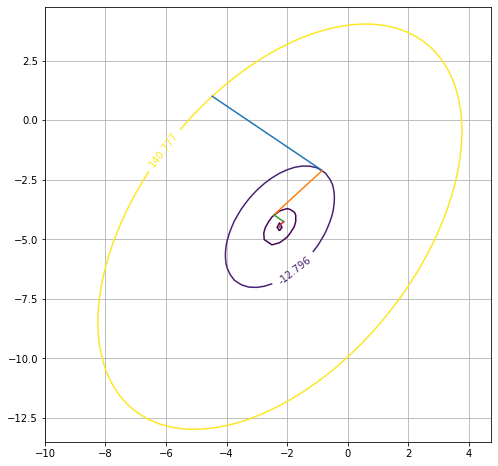

In [9]:
opt_it, points, v = fast_gd(f, x0, y0, e[1])
print("Num of its:", len(points) - 1)
print("Min", v)
print("1-d optimization num of its:", opt_it)
draw(f, points)

### Метод сопряженных градиентов

In [10]:
def MSG(f, x0, y0, eps):
    points = []
    v = np.array([x0, y0])
    points.append(v)
    p = -gradient(v)
    # grad = -gradient(v) # Метод Полака-Рибьера
    grad_square = np.dot(p, p)
    opt_it = 0
    while True:
        it, alpha = golden_section(lambda s: f(v[0] + s*p[0], v[1] + s*p[1]),
                           0, 1, eps*1e-1)
        opt_it += it
        v = v + alpha*p
        points.append(v)
        new_grad = -gradient(v)
        new_grad_square = np.dot(new_grad, new_grad)
        beta = new_grad_square/grad_square # Метод Флетчера-Ривса
        # beta = -(new_grad_square - np.dot(new_grad, grad)) # Метод Полака-Рибьера
        p = new_grad + beta*p
        grad_square = new_grad_square
        # grad = new_grad # Метод Полака-Рибьера
        if grad_square < eps:
            break
    return opt_it, points, v

Num of its: 3
Min [-2.23399041 -4.46818844]
1-d optimization num of its: 45


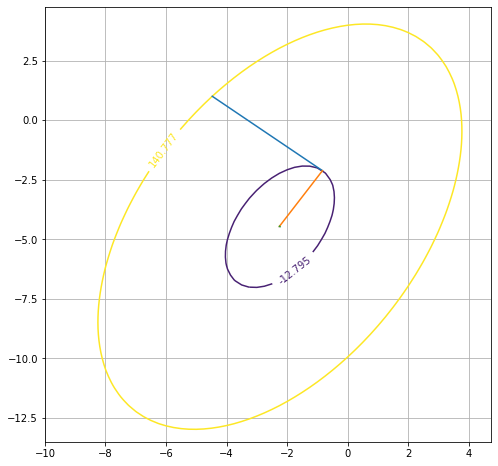

[array([-4.47213595,  1.        ]),
 array([-0.83126774, -2.12193403]),
 array([-2.25172357, -4.45642632]),
 array([-2.23399041, -4.46818844])]

In [11]:
opt_it, points, v = MSG(f, x0, y0, e[0])
print("Num of its:", len(points) - 1)
print("Min", v)
print("1-d optimization num of its:", opt_it)
draw(f, points)
points

Num of its: 2
Min [-2.23605237 -4.47214601]
1-d optimization num of its: 58


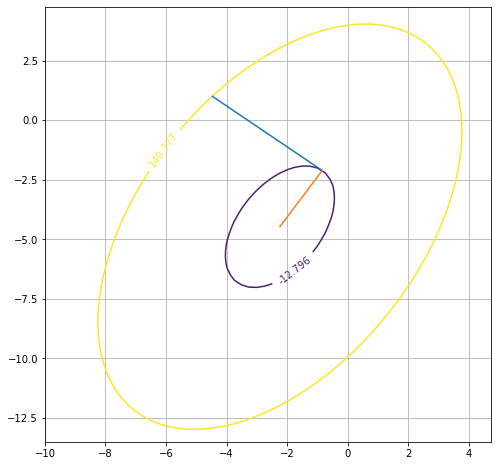

[array([-4.47213595,  1.        ]),
 array([-0.83916958, -2.11515844]),
 array([-2.23605237, -4.47214601])]

In [12]:
opt_it, points, v = MSG(f, x0, y0, e[1])
print("Num of its:", len(points) - 1)
print("Min", v)
print("1-d optimization num of its:", opt_it)
draw(f, points)
points

### Метод Ньютона

In [13]:
def hesse_inv():
    return np.linalg.inv(np.array([[12, -4], [-4, 6]]))
def newton(f, x0, y0, eps):
    points = []
    v = np.array([x0, y0])
    points.append(v)
    while True:
        v_new = v - np.dot(hesse_inv(), gradient(v))
        if np.linalg.norm(v_new - v) < eps:
            break
        points.append(v_new)
        v = v_new
    return points, v_new

Num of its: 1
Min [-2.23606798 -4.47213595]


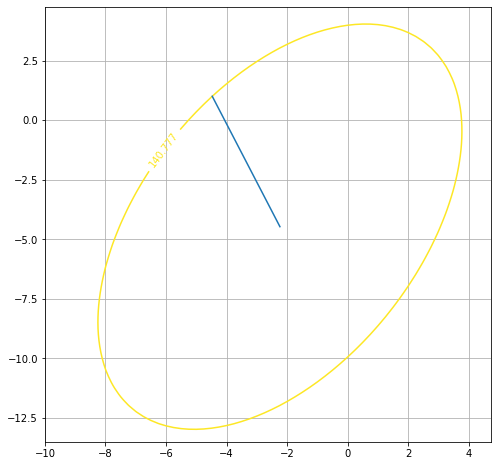

In [14]:
points, v = newton(f, x0, y0, e[0])
print("Num of its:", len(points) - 1)
print("Min", v)
draw(f, points)

Num of its: 1
Min [-2.23606798 -4.47213595]


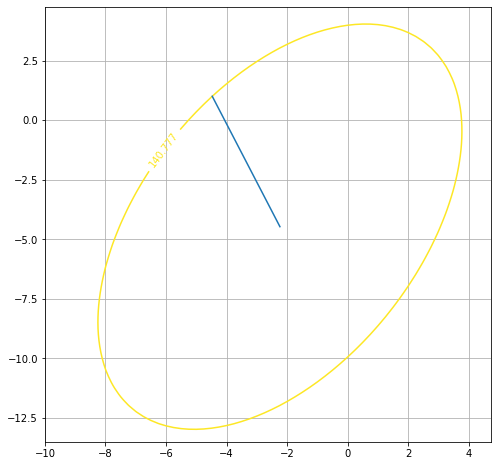

In [15]:
points, v = newton(f, x0, y0, e[1])
print("Num of its:", len(points) - 1)
print("Min", v)
draw(f, points)

### DFP

In [52]:
def dot_prod(a, b):
    return sum(ai*bi for ai, bi in zip(a, b))

def update_A(dv, dg, A):
    dv = dv.reshape(2, 1)
    dg = dg.reshape(2, 1)
    a = A.dot(dg).dot(dg.T.dot(A))
    b = dot_prod(A.dot(dg), dg)
    c = dv.dot(dv.T)
    d = dot_prod(dv, dg)
    return np.array(A - a/b + c/d)
    
def DFP(f, x0, y0, eps):
    points = []
    v = np.array([x0, y0])
    points.append(v)
    A = np.eye(2)
    grad = gradient(v)
    opt_it = 0
    while True:
        it, s = golden_section(lambda s: f(v[0] - s*A.dot(grad)[0], v[1] - s*A.dot(grad)[1]), 0, 1, eps*1e-1)
        opt_it += it
        v_new = v - s*np.dot(A, grad)
        grad_new = gradient(v_new)
        if np.linalg.norm(v_new - v) < eps:
            break
        points.append(v_new)
        
        dv = v_new - v
        dg = grad_new - grad
        
        v = v_new
        grad = grad_new
        
        A = update_A(dv, dg, A)
    return opt_it, points, v_new

Num of its: 2
1-d optimization num of its: 45
Min [-2.23606597 -4.47213808]


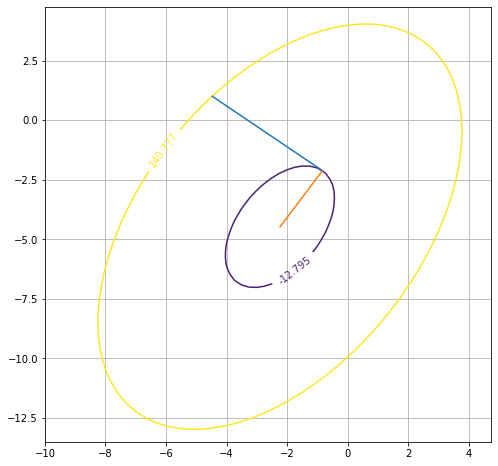

[array([-4.47213595,  1.        ]),
 array([-0.83126774, -2.12193403]),
 array([-2.23054921, -4.47795401])]

In [53]:
opt_it, points, v = DFP(f, x0, y0, e[0])
print("Num of its:", len(points) - 1)
print("1-d optimization num of its:", opt_it)
print("Min", v)
draw(f, points)
points

Num of its: 2
1-d optimization num of its: 87
Min [-2.236068   -4.47213593]


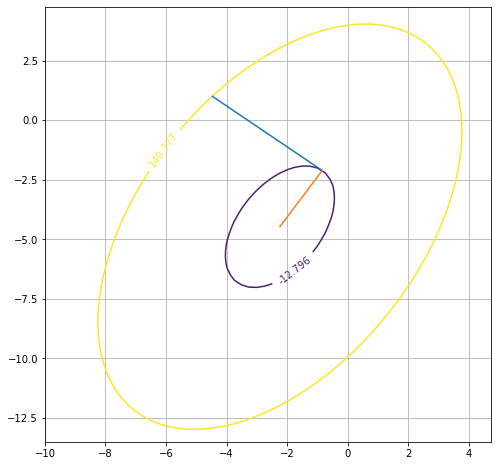

[array([-4.47213595,  1.        ]),
 array([-0.83916958, -2.11515844]),
 array([-2.23607208, -4.4721299 ])]

In [54]:
opt_it, points, v = DFP(f, x0, y0, e[1])
print("Num of its:", len(points) - 1)
print("1-d optimization num of its:", opt_it)
print("Min", v)
draw(f, points)
points